Directory structure:
raw/
  seg_pred/
    seg_pred/
  seg_test/
    seg_test/
      buildings/
      forest/
      glacier/
      mountain/
      sea/
      street/
  seg_train/
    seg_train/
      buildings/
      forest/
      glacier/
      mountain/
      sea/
      street/

Found 7321 images in seg_pred


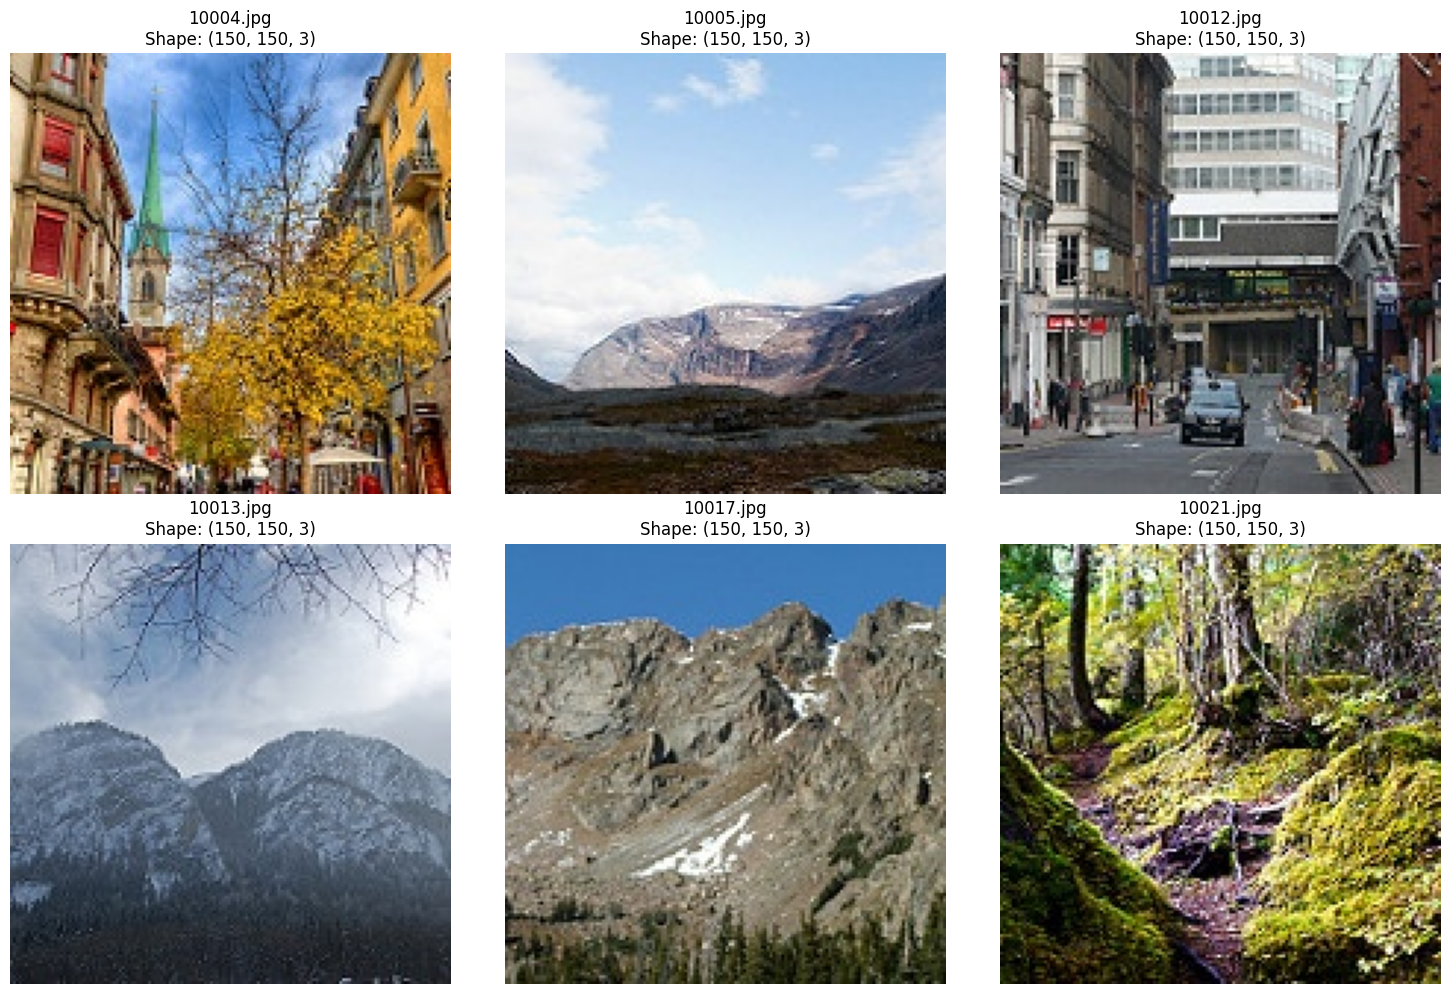

Analyzing images: 100%|██████████| 100/100 [00:01<00:00, 55.00it/s]



Image Statistics:
       width  height  channels        mean         std         min         max
count  100.0   100.0     100.0  100.000000  100.000000  100.000000  100.000000
mean   150.0   150.0       3.0  113.873900   63.345214    0.550000  254.660000
std      0.0     0.0       0.0   27.731649   12.409905    3.608002    2.234803
min    150.0   150.0       3.0   45.882578   33.174964    0.000000  235.000000
25%    150.0   150.0       3.0   95.727781   54.548467    0.000000  255.000000
50%    150.0   150.0       3.0  116.177163   61.992191    0.000000  255.000000
75%    150.0   150.0       3.0  135.643970   71.024727    0.000000  255.000000
max    150.0   150.0       3.0  168.553526   95.728712   33.000000  255.000000


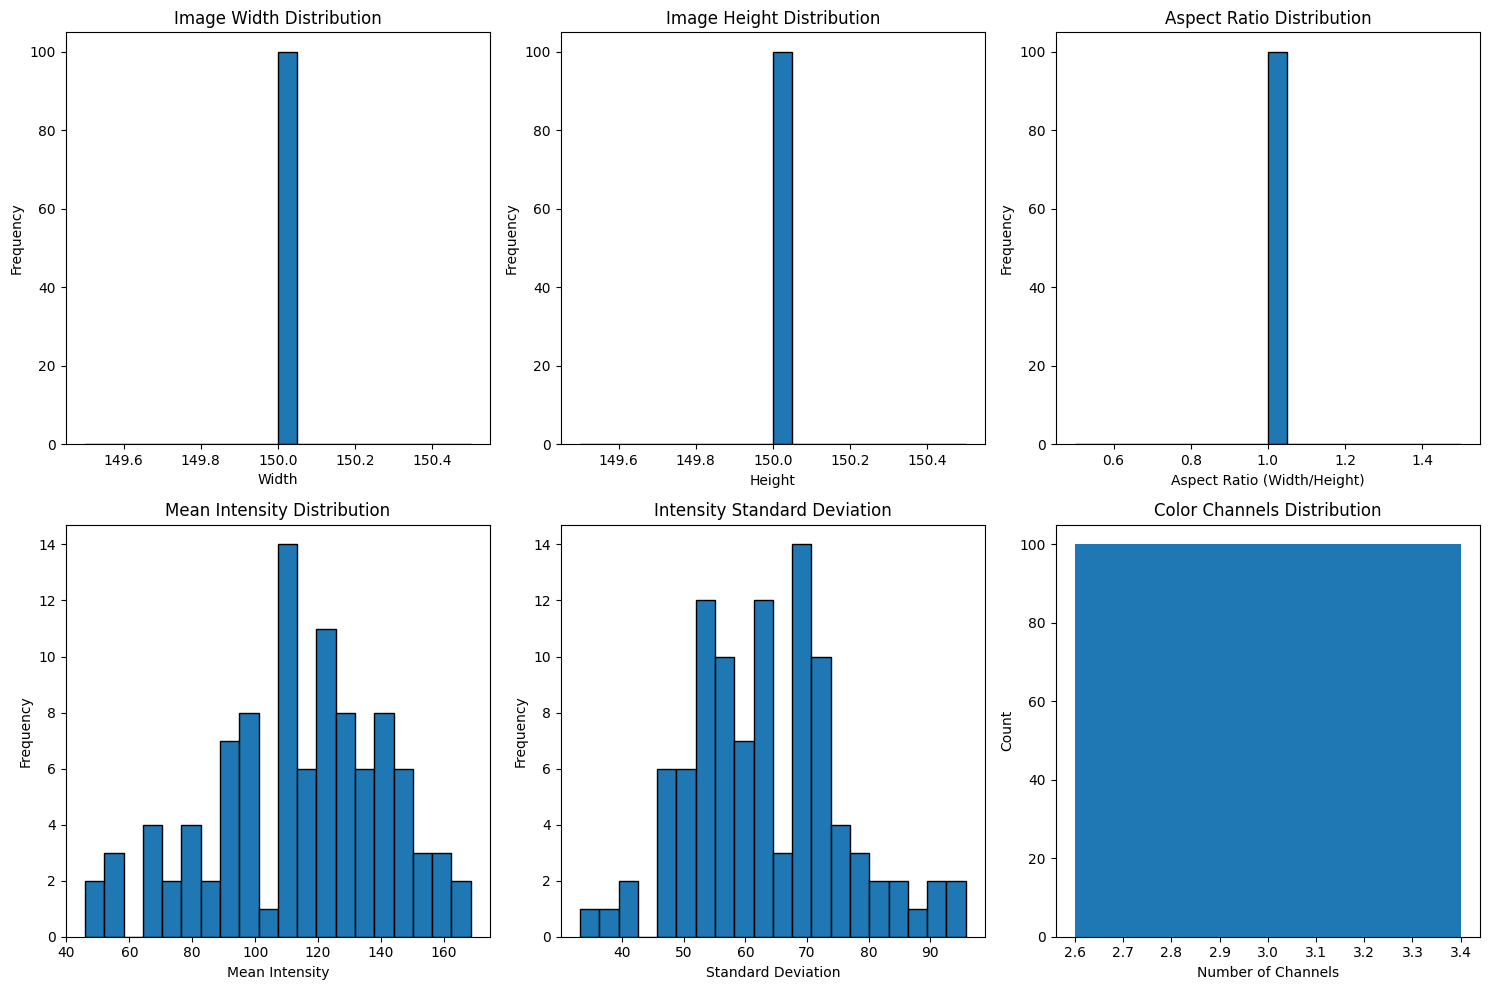


Checking for corrupt images...


Checking images: 100%|██████████| 7321/7321 [02:07<00:00, 57.51it/s]

No corrupt images found!

Exploratory analysis complete!


In [1]:
# Create this as a Jupyter notebook with the following content:

"""
# Image Segmentation - Exploratory Data Analysis

This notebook explores the dataset in `data/raw/seg_pred/`.
"""

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from tqdm import tqdm

# Set paths
DATA_DIR = Path("../data/raw")
SEG_PRED_DIR = DATA_DIR / "seg_pred"

# Check directory structure
print("Directory structure:")
for root, dirs, files in os.walk(DATA_DIR):
    level = root.replace(str(DATA_DIR), '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{Path(root).name}/")

# List images in seg_pred
image_files = []
for ext in ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']:
    image_files.extend(list(SEG_PRED_DIR.glob(ext)))

print(f"\nFound {len(image_files)} images in seg_pred")

# Display sample images
def display_sample_images(n_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, img_path in enumerate(image_files[:n_samples]):
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axes[i].imshow(img)
        axes[i].set_title(f"{img_path.name}\nShape: {img.shape}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

display_sample_images()

# Analyze image statistics
def analyze_image_statistics(image_files, max_images=100):
    stats = {
        'width': [],
        'height': [],
        'channels': [],
        'dtype': [],
        'mean': [],
        'std': [],
        'min': [],
        'max': []
    }
    
    for img_path in tqdm(image_files[:max_images], desc="Analyzing images"):
        img = cv2.imread(str(img_path))
        
        if img is not None:
            stats['width'].append(img.shape[1])
            stats['height'].append(img.shape[0])
            stats['channels'].append(img.shape[2] if len(img.shape) == 3 else 1)
            stats['dtype'].append(img.dtype)
            stats['mean'].append(img.mean())
            stats['std'].append(img.std())
            stats['min'].append(img.min())
            stats['max'].append(img.max())
    
    return pd.DataFrame(stats)

# Create analysis
df_stats = analyze_image_statistics(image_files)

# Display statistics
print("\nImage Statistics:")
print(df_stats.describe())

# Plot distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Width distribution
axes[0, 0].hist(df_stats['width'], bins=20, edgecolor='black')
axes[0, 0].set_xlabel('Width')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Image Width Distribution')

# Height distribution
axes[0, 1].hist(df_stats['height'], bins=20, edgecolor='black')
axes[0, 1].set_xlabel('Height')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Image Height Distribution')

# Aspect ratio
aspect_ratios = df_stats['width'] / df_stats['height']
axes[0, 2].hist(aspect_ratios, bins=20, edgecolor='black')
axes[0, 2].set_xlabel('Aspect Ratio (Width/Height)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Aspect Ratio Distribution')

# Mean intensity
axes[1, 0].hist(df_stats['mean'], bins=20, edgecolor='black')
axes[1, 0].set_xlabel('Mean Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Mean Intensity Distribution')

# Standard deviation
axes[1, 1].hist(df_stats['std'], bins=20, edgecolor='black')
axes[1, 1].set_xlabel('Standard Deviation')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Intensity Standard Deviation')

# Color channels
if 'channels' in df_stats.columns:
    channel_counts = df_stats['channels'].value_counts()
    axes[1, 2].bar(channel_counts.index, channel_counts.values)
    axes[1, 2].set_xlabel('Number of Channels')
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].set_title('Color Channels Distribution')

plt.tight_layout()
plt.show()

# Check for corrupt images
print("\nChecking for corrupt images...")
corrupt_images = []
for img_path in tqdm(image_files, desc="Checking images"):
    try:
        img = cv2.imread(str(img_path))
        if img is None:
            corrupt_images.append(img_path)
    except:
        corrupt_images.append(img_path)

if corrupt_images:
    print(f"Found {len(corrupt_images)} corrupt images:")
    for img_path in corrupt_images[:10]:  # Show first 10
        print(f"  - {img_path}")
else:
    print("No corrupt images found!")

print("\nExploratory analysis complete!")